In [ ]:
import random as rnd
import numpy as np
import pandas as pd
import argparse
import matplotlib.pyplot as plt

In [ ]:
class Customers:
  def __init__(self):
    self.ItemNum = 0
    self.ArrTime = 0.0
    self.QinTime = 0.0
    self.QoutTime = 0.0
    self.SinTime = 0.0
    self.SoutTime = 0.0


In [ ]:
def generate_expo(Myparameter):
  u = np.random.uniform(0,1)
  print()
  x = -1*(1/Myparameter)*np.log(1-u)
  return x

In [ ]:
class Sim_model:
  def __init__(self):
    self.lamda=10
    self.Mu =8
    self.QCapacity=9
    self.Qdiscipline ="FCFS"

    self.num_in_system=0
    self.clock=0.0
    self.t_arrival = self.generate_interarrival()
    #print("ArrivalTime: ",self.t_arrival)
    self.t_depart =float('inf')
    self.num_arrivals=0
    self.num_departs=0
    self.total_wait=0.0
    self.Que=[]
    self.SQue=[]
    self.serverStatus=0
    self.Outputs =[]
    self.Skips=[]

  def advance_time(self):
    t_event= min(self.t_arrival,self.t_depart)

    self.total_wait +=self.num_in_system*(t_event-self.clock)

    self.clock =t_event

    if(self.t_arrival >=self.t_depart):
      print("Simulation Clock :",self.clock, " -- Departure of Customer")
      self.handle_depart_event()
    else:
      print("Simulation Clock :",self.clock, " -- Arrival of Customer")
      self.handle_arrival_event()


  def handle_arrival_event(self):
      self.num_in_system+=1
      self.num_arrivals+=1
      Customers = Customers()
     # print("New Gen ITem Customers",Customers.ItemNum)
      #print("self.num_arrivals",self.num_arrivals)

      Customers.ItemNum = self.num_arrivals
      Customers.ArrTime = self.clock

      if self.num_in_system<=1: # if server is free
        self.t_depart =self.clock+self.generate_service()
        self.serverStatus=1
        Customers.QinTime = self.clock
        Customers.QoutTime = self.clock
        Customers.SinTime = self.clock
        self.SQue.append(Customers)
        #print("item goes to service",self.SQue)
      else:
        #checking (if Que has Space or not)
        if(len(self.Que)>=self.QCapacity):
          #print("Queue is full" , self.Que)
          self.Skips.append(Customers)
          self.num_in_system-=1
        else:
          self.Que.append(Customers)
          Customers.QinTime = self.clock
          #print("Item goest to self.Que",self.Que)

      self.t_arrival =self.clock +self.generate_interarrival()

  

  def handle_depart_event(self):
    self.num_in_system-=1
    self.num_departs+=1
    currItem=self.SQue[0]
    currItem.SoutTime = self.clock
    self.Outputs.append(currItem)

    if(self.num_in_system>0):
      #if(len(self.Que[0])>0)
      if(self.Qdiscipline=="FCFS"):
        Nextitem = self.Que[0]
      elif(self.Qdiscipline=="LCFS"):
        Nextitem = self.Que[-1]
      
      Nextitem.QoutTime = self.clock
      Nextitem.SinTime = self.clock
      self.SQue[0]=Nextitem
      #print("item goes to service",self.SQue)
      if(self.Qdiscipline=="FCFS"):
        self.Que=self.Que[1:]
      elif(self.Qdiscipline=="LCFS"):
        self.Que=self.Que[0:-1]

      
      self.t_depart=self.clock+self.generate_service()
    else:
      self.t_depart=float('inf')
      self.SQue=[]
      
  def generate_interarrival(self):
    return generate_expo(self.lamda)

  def generate_service(self):
    return generate_expo(self.Mu)
  


In [ ]:
np.random.seed(10)
sim=Sim_model()
RunTime = 100
sim.Qdiscipline = "LCFS"
StatusTime = []
CustomersinSys=[]
TimeFull=[]
initialTime=0
eventwhenKisfull =0

while (sim.clock <= RunTime):
  #print("Simulation Clock : ",sim.num_in_system)
  sim.advance_time()
  print("num_arrivals ",sim.num_arrivals)
  print("num_in_system ",sim.num_in_system)
  
  StatusTime.append(sim.clock)
  CustomersinSys.append(sim.num_in_system)

  if(sim.num_in_system==10):
    if(eventwhenKisfull==0):
      eventwhenKisfull=1
      initialTime=sim.clock
    else:
      TimeFull.append(sim.clock-initialTime)
      initialTime=sim.clock
  
  if(sim.num_in_system!=10):
    if(eventwhenKisfull==1):
      TimeFull.append(sim.clock-initialTime)
      eventwhenKisfull=0


  print("num_in_queue ",len(sim.Que))
  print("num_in_service ",len(sim.SQue))
  print("num_departs ",sim.num_departs)
  print("num_in_skips ",len(sim.Skips))
  print("----------")



Streaming output truncated to the last 5000 lines.
num_in_queue  9
num_in_service  1
num_departs  550
num_in_skips  138
----------
Simulation Clock : 69.16093330945675  -- Departure of Customer

num_arrivals  698
num_in_system  9
num_in_queue  8
num_in_service  1
num_departs  551
num_in_skips  138
----------
Simulation Clock : 69.17218399272723  -- Arrival of Customer

num_arrivals  699
num_in_system  10
num_in_queue  9
num_in_service  1
num_departs  551
num_in_skips  138
----------
Simulation Clock : 69.43980895299757  -- Arrival of Customer

num_arrivals  700
num_in_system  10
num_in_queue  9
num_in_service  1
num_departs  551
num_in_skips  139
----------
Simulation Clock : 69.49682865305209  -- Departure of Customer

num_arrivals  700
num_in_system  9
num_in_queue  8
num_in_service  1
num_departs  552
num_in_skips  139
----------
Simulation Clock : 69.52949303400017  -- Arrival of Customer

num_arrivals  701
num_in_system  10
num_in_queue  9
num_in_service  1
num_departs  552
num_in

Text(0.5, 1.0, 'Customers K Vs t')

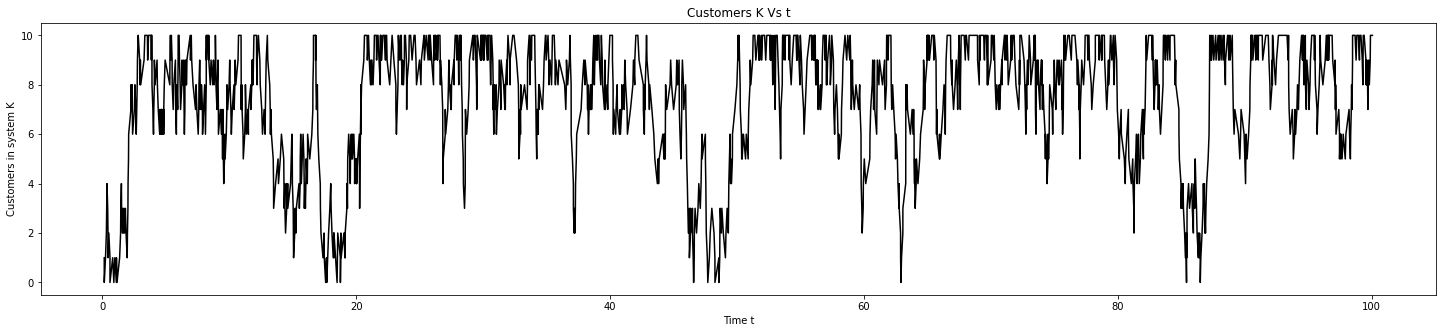

In [ ]:

import pandas
Results = pandas.DataFrame({ "Time":StatusTime,"Customers K": CustomersinSys})
Results
#plot graph
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
plt.plot(Results["Time"], Results["Customers K"],color="black")

plt.xlabel('Time t')
# naming the y axis
plt.ylabel('Customers in system K')
# giving a title to my graph
plt.title('Customers K Vs t')


In [ ]:
ItemNum =[]
ArrTime=[]
QinTime=[]
QoutTime=[]
SinTime=[]
SoutTime=[]
STime=[]
TimeinQueue=[]
TimeinSystem=[]


for selItem in sim.Outputs:
  ItemNum.append(selItem.ItemNum)
  ArrTime.append(selItem.ArrTime)
  QinTime.append(selItem.QinTime)
  QoutTime.append(selItem.QoutTime)
  TimeinQueue.append(selItem.QoutTime-selItem.QinTime)
  SinTime.append(selItem.SinTime)
  SoutTime.append(selItem.SoutTime)
  STime.append(selItem.SoutTime-selItem.SinTime)
  TimeinSystem.append(selItem.SoutTime-selItem.ArrTime)

print("Q discipline: ",sim.Qdiscipline)
print("Average Time in System: " ,  np.mean(TimeinSystem))
print("min Time in System: " ,  min(TimeinSystem))
print("max Time in System: " ,  max(TimeinSystem))
print()
print("Average Time in Queue: " ,  np.mean(TimeinQueue))
print("min Time in Queue: " ,  min(TimeinQueue))
print("Max Time in Queue: " ,  max(TimeinQueue))
print("Number of Customers Skiped : ",len(sim.Skips))
print("Number of Q/T : ",len(sim.Skips)/RunTime)
print("Sum of Time when system was full was full",sum(TimeFull)/RunTime)

print("(Departure Rate)= ",len(sim.Outputs)/RunTime)
print("Guess (DepartureRate) ",sim.Mu) 


import pandas
Results = pandas.DataFrame({ "Customer":ItemNum,"ArrTime": ArrTime, 'QinTime': QinTime,'QoutTime':QoutTime,"TimeinQueue":TimeinQueue, "SinTime" : SinTime,"SoutTime": SoutTime,"Service Time":STime,"Time in System" : TimeinSystem })
Results


Q discipline:  LCFS
Average Time in System:  0.8756594549719376
min Time in System:  0.001657109578410143
max Time in System:  27.350777034477822

Average Time in Queue:  0.7501993563880429
min Time in Queue:  0.0
Max Time in Queue:  27.118973409541425
Number of Customers Skiped :  227
Number of Q/T :  2.27
Sum of Time when K  was full 0.22760626670786516
D(t)/t (Departure Rate)=  7.83
Guess (DepartureRate)  8


,Customer,ArrTime,QinTime,QoutTime,TimeinQueue,SinTime,SoutTime,Service Time,Time in System
0,1,0.147543,0.147543,0.147543,0.000000,0.147543,0.150165,0.002621,0.002621
1,2,0.247960,0.247960,0.247960,0.000000,0.247960,0.420650,0.172690,0.172690
2,5,0.364512,0.364512,0.420650,0.056138,0.420650,0.443807,0.023157,0.079295
3,4,0.342439,0.342439,0.443807,0.101368,0.443807,0.455368,0.011561,0.112929
4,3,0.316976,0.316976,0.455368,0.138392,0.455368,0.599909,0.144541,0.282933
...,...,...,...,...,...,...,...,...,...
778,1011,99.341190,99.341190,99.552327,0.211137,99.552327,99.578863,0.026536,0.237673
779,1010,99.322880,99.322880,99.578863,0.255983,99.578863,99.596763,0.017900,0.273883
780,1014,99.582585,99.582585,99.596763,0.014178,99.596763,99.680934,0.084171,0.098349
781,1015,99.630356,99.630356,99.680934,0.050578,99.680934,99.706173,0.025239,0.075816


In [ ]:
Results[Results["Time in System"]==max(Results["Time in System"])]

,Customer,ArrTime,QinTime,QoutTime,TimeinQueue,SinTime,SoutTime,Service Time,Time in System
382,191,19.130917,19.130917,46.24989,27.118973,46.24989,46.481694,0.231804,27.350777


In [ ]:
ItemNum =[]
ArrTime=[]
QinTime=[]
QoutTime=[]
SinTime=[]
SoutTime=[]

for selItem in sim.Skips:
  ItemNum.append(selItem.ItemNum)
  ArrTime.append(selItem.ArrTime)
  QinTime.append(selItem.QinTime)
  QoutTime.append(selItem.QoutTime)
  SinTime.append(selItem.SinTime)
  SoutTime.append(selItem.SoutTime)

print("Number of Customers Skiped : ",len(sim.Skips))
import pandas
Results = pandas.DataFrame({ "Customer":ItemNum,"ArrTime": ArrTime, 'QinTime': QinTime,'QoutTime':QoutTime, "SinTime" : SinTime,"SoutTime": SoutTime })
Results

Number of Customers Skiped :  227


,Customer,ArrTime,QinTime,QoutTime,SinTime,SoutTime
0,31,2.823978,0.0,0.0,0.0,0.0
1,35,3.520658,0.0,0.0,0.0,0.0
2,36,3.549610,0.0,0.0,0.0,0.0
3,38,3.717060,0.0,0.0,0.0,0.0
4,39,3.806269,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
222,1007,98.963857,0.0,0.0,0.0,0.0
223,1009,99.158870,0.0,0.0,0.0,0.0
224,1012,99.382190,0.0,0.0,0.0,0.0
225,1013,99.411163,0.0,0.0,0.0,0.0


In [ ]:
sim.Que

In [ ]:
for selItem in sim.Que:
    print(selItem)
    print("ItemNum",selItem.ItemNum)
    print("ArrTime",selItem.ArrTime)
    print("QinTime",selItem.QinTime)
    print("QoutTime",selItem.QoutTime)
    print("SinTime",selItem.SinTime)
    print("SoutTime",selItem.SoutTime)
    print("-------------------")

ItemNum 872
ArrTime 86.64024893722977
QinTime 86.64024893722977
QoutTime 0.0
SinTime 0.0
SoutTime 0.0
-------------------
ItemNum 877
ArrTime 86.9453699234456
QinTime 86.9453699234456
QoutTime 0.0
SinTime 0.0
SoutTime 0.0
-------------------
ItemNum 878
ArrTime 87.00303709271707
QinTime 87.00303709271707
QoutTime 0.0
SinTime 0.0
SoutTime 0.0
-------------------
ItemNum 904
ArrTime 90.09189033632849
QinTime 90.09189033632849
QoutTime 0.0
SinTime 0.0
SoutTime 0.0
-------------------
ItemNum 998
ArrTime 98.34962319879338
QinTime 98.34962319879338
QoutTime 0.0
SinTime 0.0
SoutTime 0.0
-------------------
ItemNum 999
ArrTime 98.39820248723929
QinTime 98.39820248723929
QoutTime 0.0
SinTime 0.0
SoutTime 0.0
-------------------
ItemNum 1016
ArrTime 99.72609830954492
QinTime 99.72609830954492
QoutTime 0.0
SinTime 0.0
SoutTime 0.0
-------------------
ItemNum 1018
ArrTime 99.88957404357532
QinTime 99.88957404357532
QoutTime 0.0
SinTime 0.0
SoutTime 0.0
-------------------
ItemNum 1019
ArrTime 99.